In [2]:
!pip install --upgrade numexpr

     ---------------------------------------- 95.3/95.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.1
    Uninstalling numexpr-2.8.1:
      Successfully uninstalled numexpr-2.8.1



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas
!pip install nltk
!pip install wordcloud
!pip install mplcursors
!pip install seaborn
!pip install graphviz
!pip install wordtree
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 12.8/12.8 MB 20.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import mplcursors
import matplotlib.image as mpimg
import wordtree
import os
import matplotlib
import re
import spacy
from textblob import TextBlob, Word
from tqdm import tqdm

nltk.download(['punkt','stopwords','wordnet','omw-1.4','averaged_perceptron_tagger'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juhij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juhij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juhij\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\juhij\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\juhij\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
csv_file = 'C:\\Users\\juhij\\Downloads\\final_merged.csv'
df = pd.read_csv(csv_file)
df

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0
1,005db917,0.0,Transportation is a large necessity in most co...,0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
30518,NaN,NaN,There has been a fuss about the Elector Colleg...,0
30519,NaN,NaN,Limiting car usage has many advantages. Such a...,0
30520,NaN,NaN,There's a new trend that has been developing f...,0
30521,NaN,NaN,As we all know cars are a big part of our soci...,0


In [8]:
df = df.drop_duplicates(subset='text', keep='first')
df

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0
1,005db917,0.0,Transportation is a large necessity in most co...,0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
29140,NaN,NaN,Today's society is ever-evolving and the role ...,1
29141,NaN,NaN,The ever-evolving world of technology has chan...,1
29142,NaN,NaN,Fostering a Rescue Dog: Gaining Unconditional ...,1
29143,NaN,NaN,The importance of a solid foundation in educat...,1


In [9]:
df['generated'].value_counts()

0    16122
1    11218
Name: generated, dtype: int64

### Data Preprocessing

In [17]:
essays = df['text'].tolist()
tokenized_data = [word_tokenize(essay) for essay in tqdm(essays)]

print(tokenized_data[0])


100%|██████████| 27340/27340 [02:00<00:00, 226.77it/s]

['Cars', '.', 'Cars', 'have', 'been', 'around', 'since', 'they', 'became', 'famous', 'in', 'the', '1900s', ',', 'when', 'Henry', 'Ford', 'created', 'and', 'built', 'the', 'first', 'ModelT', '.', 'Cars', 'have', 'played', 'a', 'major', 'role', 'in', 'our', 'every', 'day', 'lives', 'since', 'then', '.', 'But', 'now', ',', 'people', 'are', 'starting', 'to', 'question', 'if', 'limiting', 'car', 'usage', 'would', 'be', 'a', 'good', 'thing', '.', 'To', 'me', ',', 'limiting', 'the', 'use', 'of', 'cars', 'might', 'be', 'a', 'good', 'thing', 'to', 'do', '.', 'In', 'like', 'matter', 'of', 'this', ',', 'article', ',', '``', 'In', 'German', 'Suburb', ',', 'Life', 'Goes', 'On', 'Without', 'Cars', ',', "''", 'by', 'Elizabeth', 'Rosenthal', 'states', ',', 'how', 'automobiles', 'are', 'the', 'linchpin', 'of', 'suburbs', ',', 'where', 'middle', 'class', 'families', 'from', 'either', 'Shanghai', 'or', 'Chicago', 'tend', 'to', 'make', 'their', 'homes', '.', 'Experts', 'say', 'how', 'this', 'is', 'a', 'hu

##### Make lowercase and remove punctuation:

##### We remove irrelevant characters like punctuations. To do so, we check if the word is alphanumeric or not thus using only words and omitting punctuations.
##### To remove redundancy we make the words lowercase so words like "DeviCEs" and "devices" are considered to be same and redundancy is removed.

In [18]:
data_processed= [[word.lower() for word in essay if word.isalpha()] for essay in tokenized_data]
print(data_processed[0])

['cars', 'cars', 'have', 'been', 'around', 'since', 'they', 'became', 'famous', 'in', 'the', 'when', 'henry', 'ford', 'created', 'and', 'built', 'the', 'first', 'modelt', 'cars', 'have', 'played', 'a', 'major', 'role', 'in', 'our', 'every', 'day', 'lives', 'since', 'then', 'but', 'now', 'people', 'are', 'starting', 'to', 'question', 'if', 'limiting', 'car', 'usage', 'would', 'be', 'a', 'good', 'thing', 'to', 'me', 'limiting', 'the', 'use', 'of', 'cars', 'might', 'be', 'a', 'good', 'thing', 'to', 'do', 'in', 'like', 'matter', 'of', 'this', 'article', 'in', 'german', 'suburb', 'life', 'goes', 'on', 'without', 'cars', 'by', 'elizabeth', 'rosenthal', 'states', 'how', 'automobiles', 'are', 'the', 'linchpin', 'of', 'suburbs', 'where', 'middle', 'class', 'families', 'from', 'either', 'shanghai', 'or', 'chicago', 'tend', 'to', 'make', 'their', 'homes', 'experts', 'say', 'how', 'this', 'is', 'a', 'huge', 'impediment', 'to', 'current', 'efforts', 'to', 'reduce', 'greenhouse', 'gas', 'emissions',

In [19]:
flattened = [val for essay in data_processed for val in essay]
count = Counter(flattened)
count.most_common(10)

[('the', 478221),
 ('to', 341458),
 ('and', 262567),
 ('a', 237747),
 ('of', 229121),
 ('in', 182381),
 ('is', 164822),
 ('that', 162721),
 ('it', 137153),
 ('for', 115089)]

##### As we can see above, the most common words are those which provide very little value to the data. So lets remove these stopwords and find the most common words relevant to the data



In [20]:
stop_words = stopwords.words('english')
data_processed = [[word for word in essay if word not in stop_words] for essay in data_processed]
data_processed_main = data_processed
print(data_processed_main[0])

['cars', 'cars', 'around', 'since', 'became', 'famous', 'henry', 'ford', 'created', 'built', 'first', 'modelt', 'cars', 'played', 'major', 'role', 'every', 'day', 'lives', 'since', 'people', 'starting', 'question', 'limiting', 'car', 'usage', 'would', 'good', 'thing', 'limiting', 'use', 'cars', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'goes', 'without', 'cars', 'elizabeth', 'rosenthal', 'states', 'automobiles', 'linchpin', 'suburbs', 'middle', 'class', 'families', 'either', 'shanghai', 'chicago', 'tend', 'make', 'homes', 'experts', 'say', 'huge', 'impediment', 'current', 'efforts', 'reduce', 'greenhouse', 'gas', 'emissions', 'tailpipe', 'passenger', 'cars', 'responsible', 'percent', 'greenhouse', 'gas', 'emissions', 'europe', 'percent', 'carintensive', 'areas', 'united', 'states', 'cars', 'main', 'reason', 'greenhouse', 'gas', 'emissions', 'lot', 'people', 'driving', 'around', 'time', 'getting', 'need', 'go', 'article', 'paris', 'bans', 'drivin

In [12]:
flattened = [val for essay in data_processed_main for val in essay]
count = Counter(flattened)
count.most_common(10)

[('people', 76077),
 ('would', 40067),
 ('one', 36173),
 ('electoral', 35187),
 ('also', 32572),
 ('college', 31699),
 ('like', 29341),
 ('could', 28942),
 ('help', 28345),
 ('car', 27853)]

##### Lemmatization

In [21]:
from tqdm import tqdm
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words, pos_tags):
    return [lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in zip(words, pos_tags)]

def wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
#sentPos = [nltk.pos_tag(sent) for sent in tqdm(data_processed_main)]
#dataLemma = [[lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in pos_tags] for pos_tags in tqdm(sentPos)]
dataLemma = [[lemmatizer.lemmatize(word) for word in sent] for sent in tqdm(data_processed_main)]

print(dataLemma[0])

100%|██████████| 27340/27340 [00:41<00:00, 666.64it/s] 

['car', 'car', 'around', 'since', 'became', 'famous', 'henry', 'ford', 'created', 'built', 'first', 'modelt', 'car', 'played', 'major', 'role', 'every', 'day', 'life', 'since', 'people', 'starting', 'question', 'limiting', 'car', 'usage', 'would', 'good', 'thing', 'limiting', 'use', 'car', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'go', 'without', 'car', 'elizabeth', 'rosenthal', 'state', 'automobile', 'linchpin', 'suburb', 'middle', 'class', 'family', 'either', 'shanghai', 'chicago', 'tend', 'make', 'home', 'expert', 'say', 'huge', 'impediment', 'current', 'effort', 'reduce', 'greenhouse', 'gas', 'emission', 'tailpipe', 'passenger', 'car', 'responsible', 'percent', 'greenhouse', 'gas', 'emission', 'europe', 'percent', 'carintensive', 'area', 'united', 'state', 'car', 'main', 'reason', 'greenhouse', 'gas', 'emission', 'lot', 'people', 'driving', 'around', 'time', 'getting', 'need', 'go', 'article', 'paris', 'ban', 'driving', 'due', 'smog', 'robe

In [11]:
import json
file_path = 'lemmatized.json'

with open(file_path, 'w') as json_file:
    json.dump(dataLemma, json_file)


In [56]:
import json

file_path = 'lemmatized.json'

# Read the list from the JSON file
with open(file_path, 'r') as json_file:
    dataLemma = json.load(json_file)
print(dataLemma[0])

['car', 'car', 'around', 'since', 'become', 'famous', 'henry', 'ford', 'create', 'build', 'first', 'modelt', 'car', 'play', 'major', 'role', 'every', 'day', 'live', 'since', 'people', 'start', 'question', 'limit', 'car', 'usage', 'would', 'good', 'thing', 'limit', 'use', 'car', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'go', 'without', 'car', 'elizabeth', 'rosenthal', 'state', 'automobile', 'linchpin', 'suburbs', 'middle', 'class', 'family', 'either', 'shanghai', 'chicago', 'tend', 'make', 'home', 'expert', 'say', 'huge', 'impediment', 'current', 'effort', 'reduce', 'greenhouse', 'gas', 'emission', 'tailpipe', 'passenger', 'car', 'responsible', 'percent', 'greenhouse', 'gas', 'emission', 'europe', 'percent', 'carintensive', 'area', 'united', 'state', 'car', 'main', 'reason', 'greenhouse', 'gas', 'emission', 'lot', 'people', 'drive', 'around', 'time', 'get', 'need', 'go', 'article', 'paris', 'ban', 'drive', 'due', 'smog', 'robert', 'duffer', 'say

### Word Cloud

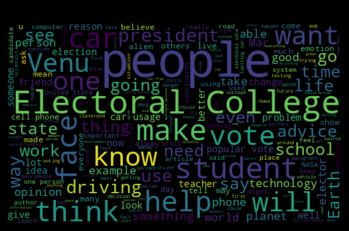

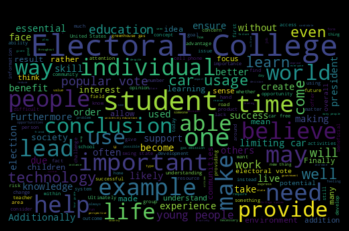

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data for human-generated and AI-generated text
human_data = df[df['generated'] == 0]['text'].values.tolist()
ai_data = df[df['generated'] == 1]['text'].values.tolist()

human_data = ' '.join(human_data)
ai_data = ' '.join(ai_data)
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(
        width=500,
        height=300,
        background_color='black',
        stopwords=STOPWORDS
    ).generate(text)

    fig, ax = plt.subplots(facecolor='k', edgecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for human-generated and AI-generated text
generate_word_cloud(human_data, 'Human Generated Word Cloud')
generate_word_cloud(ai_data, 'AI Generated Word Cloud')


#### Tf-IDF

In [22]:
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatized_text = [' '.join(words) for words in dataLemma]


vectorizer = TfidfVectorizer(max_df = 0.6)
tfidf_vector = vectorizer.fit_transform(lemmatized_text)


#tfidf_vector = tfidf_matrix.toarray()
tfidf_filename = 'tfidf_matrix_Train_Essay_Data.joblib'
joblib.dump(tfidf_vector, tfidf_filename)

tfidf_vector

<27340x64105 sparse matrix of type '<class 'numpy.float64'>'
	with 3141098 stored elements in Compressed Sparse Row format>

### Data Splitting

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [24]:
y = df['generated']
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, y , test_size=0.2, shuffle = True)
print('Shape of training data is: ',X_train.shape)
print('Shape of training labels is: ',y_train.shape)
print('Shape of testing data is: ',X_test.shape)
print('Shape of testing labels is: ',y_test.shape)

Shape of training data is:  (21872, 64105)
Shape of training labels is:  (21872,)
Shape of testing data is:  (5468, 64105)
Shape of testing labels is:  (5468,)


In [25]:
y_test.value_counts()

0    3203
1    2265
Name: generated, dtype: int64

In [37]:
!pip install tensorflow --upgrade


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!pip uninstall numpy

^C


### Neural Network

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.optimizers import Adam


# Build the neural network model with LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50, input_length=tfidf_vector.shape[1]))  # Embedding layer for word representations
model.add(LSTM(100))  # LSTM layer with 100 units
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train.toarray(), y_train, epochs=50, batch_size=64, validation_split=0.2)




RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [ ]:
# Evaluate the model on the test set

y_pred = model.predict(X_test.toarray())
y_pred_binary = (y_pred > 0.5).astype(int)

# Decode predictions
y_pred_decoded = label_encoder.inverse_transform(y_pred_binary.flatten())

# Evaluate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

classification_rep = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', classification_rep)

### Base Line Model - Logistic Regression

In [43]:
from sklearn.metrics import confusion_matrix

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    LRaccuracy = accuracy_score(y_test, y_pred)
    LRprecision = precision_score(y_test, y_pred)
    LRrecall = recall_score(y_test, y_pred)
    LRf1 = f1_score(y_test, y_pred)
    print('Precision is: ',LRprecision)
    print('Accuracy is: ',LRaccuracy)
    print('Recall is: ',LRrecall)
    print('F1 is: ',LRf1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Precision is:  0.9892231701841042
Accuracy is:  0.9842721287490855
Recall is:  0.9726269315673289
F1 is:  0.9808548530721283


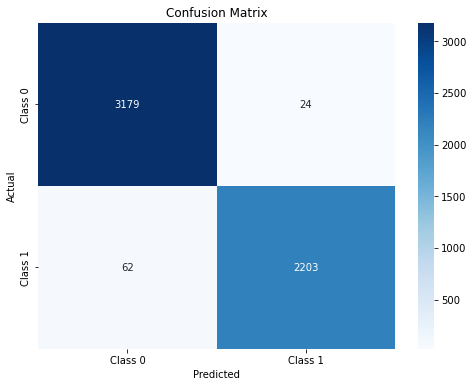

In [44]:
import pickle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

with open('logreg_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

evaluate(logreg, X_test, y_test)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   32.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Precision is:  0.9941599281221922
Accuracy is:  0.9890270665691295
Recall is:  0.9792035398230089
F1 is:  0.9866250557289344


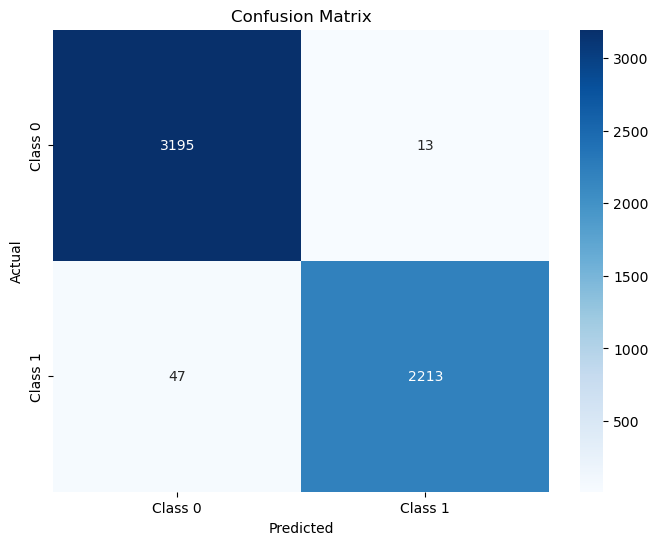

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(verbose=1)
randomForest.fit(X_train, y_train)

with open('ranFor_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(randomForest, model_file)
evaluate(randomForest, X_test, y_test)


Precision is:  0.9157754010695187
Accuracy is:  0.9279444038039503
Recall is:  0.9092920353982301
F1 is:  0.9125222024866786


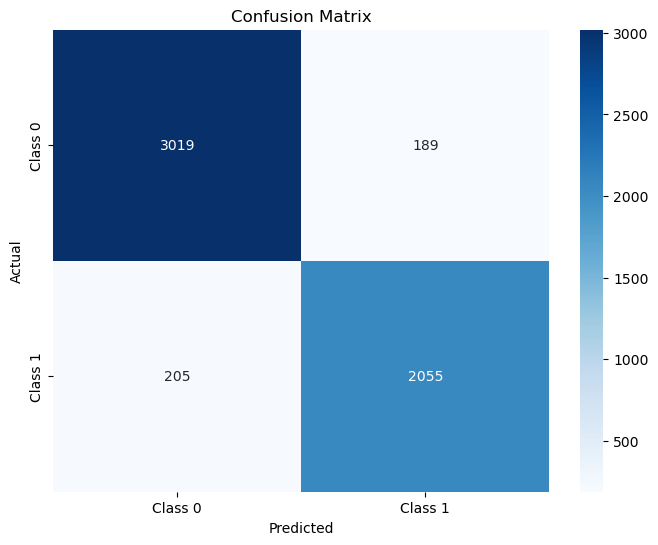

In [34]:
decTree = DecisionTreeClassifier()
decTree.fit(X_train, y_train)

with open('decTree_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(decTree, model_file)
evaluate(decTree, X_test, y_test)


Precision is:  0.9823609226594301
Accuracy is:  0.976773957571324
Recall is:  0.9610619469026549
F1 is:  0.9715947215388057


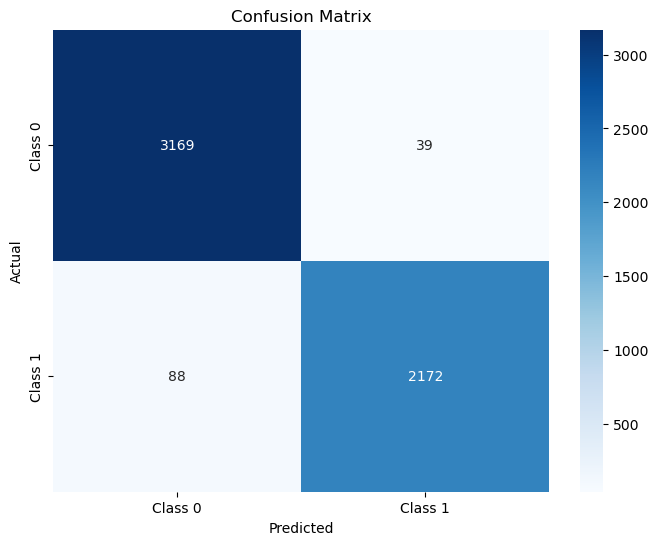

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

with open('gb_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(gb, model_file)
evaluate(gb, X_test, y_test)


In [63]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    LRaccuracy = accuracy_score(y_test, y_pred)
    LRprecision = precision_score(y_test, y_pred)
    LRrecall = recall_score(y_test, y_pred)
    LRf1 = f1_score(y_test, y_pred)
    print('Precision is: ',LRprecision)
    print('Accuracy is: ',LRaccuracy)
    print('Recall is: ',LRrecall)
    print('F1 is: ',LRf1)

evaluate(logreg, X_test, y_test)
print()
evaluate(randomForest, X_test, y_test)
print()
evaluate(decTree, X_test, y_test)


Precision is:  0.9938398357289527
Accuracy is:  0.9947368421052631
Recall is:  0.9979381443298969
F1 is:  0.9958847736625515

Precision is:  0.9757575757575757
Accuracy is:  0.9815789473684211
Recall is:  0.9958762886597938
F1 is:  0.9857142857142858


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


### Testing

In [35]:
test_df = pd.read_csv('dataset/article_level_data.csv')
test_text = test_df['article'].values.tolist()


In [45]:
test_text = ['I love car']

In [46]:
stop_words = stopwords.words('english')
tokenized_data = [word_tokenize(essay) for essay in test_text]
data_processed= [[word.lower() for word in essay if word.isalpha()] for essay in tokenized_data]
data_processed_main = [[word for word in essay if word not in stop_words] for essay in data_processed]
sentPos = [nltk.pos_tag(sent) for sent in data_processed_main]
dataLemma = [[lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in pos_tags] for pos_tags in sentPos]
test_tfidf = vectorizer.transform([' '.join(lemma) for lemma in dataLemma])
print(test_tfidf.toarray().shape)


(1, 64105)


In [47]:
logreg.predict(test_tfidf)

array([0], dtype=int64)

Precision is:  0.5024679170779862
Accuracy is:  0.5049115913555993
Recall is:  1.0
F1 is:  0.668856767411301


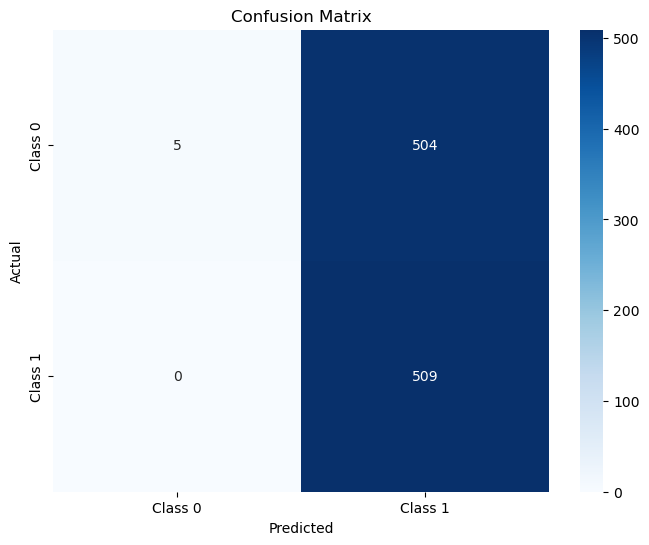


Precision is:  0.5059760956175299
Accuracy is:  0.5117878192534381
Recall is:  0.9980353634577603
F1 is:  0.6715135492399207


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


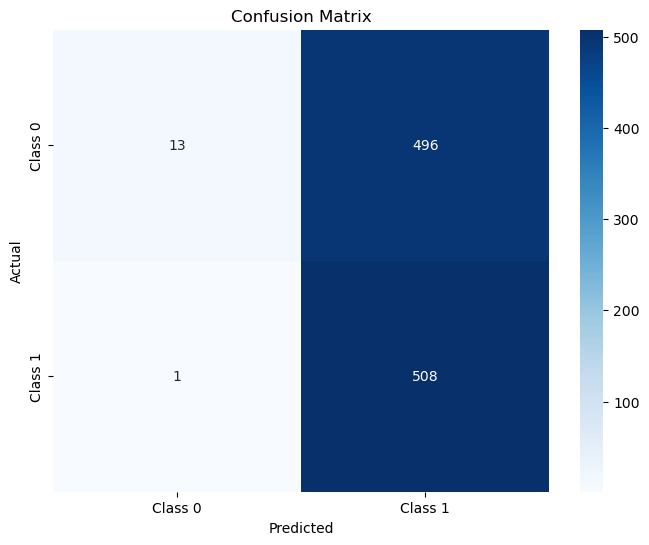


Precision is:  0.5199556541019955
Accuracy is:  0.5353634577603144
Recall is:  0.9214145383104125
F1 is:  0.664776754075124


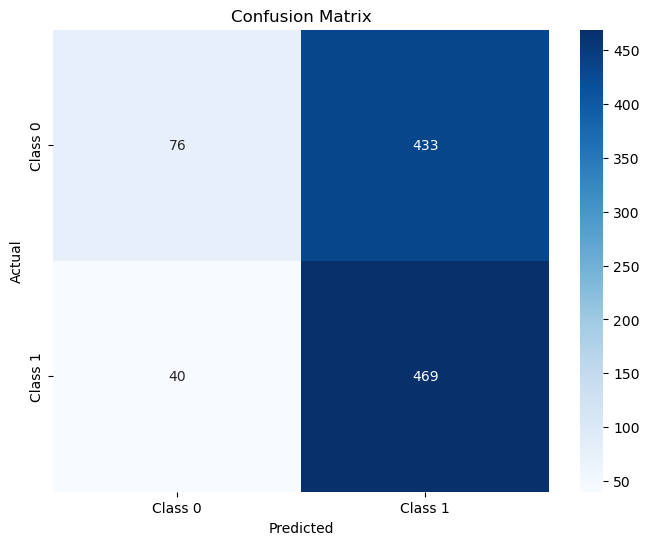


Precision is:  0.5080160320641283
Accuracy is:  0.5157170923379175
Recall is:  0.9960707269155207
F1 is:  0.6728599867285998


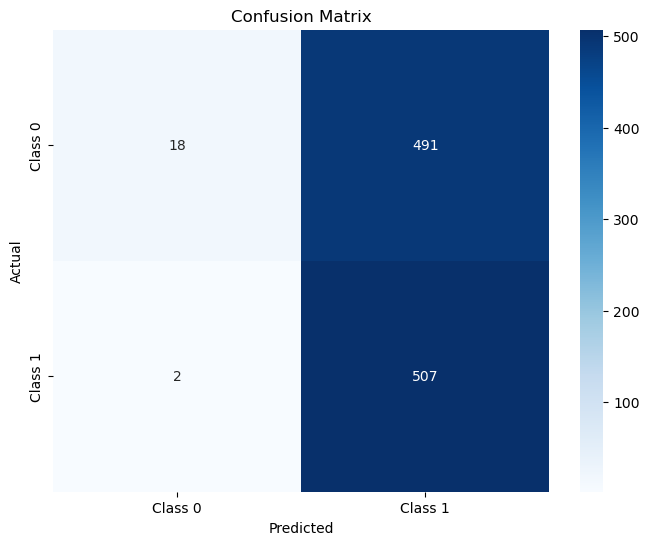

In [42]:
evaluate(logreg, test_tfidf, test_df['class'])
print()
evaluate(randomForest, test_tfidf, test_df['class'])
print()
evaluate(decTree, test_tfidf, test_df['class'])
print()
evaluate(gb, test_tfidf, test_df['class'])


In [60]:
y_pred_selected = logreg.predict(test_tfidf.toarray())

LRaccuracy = accuracy_score(y_test_selected, y_pred_selected)
LRprecision = precision_score(y_test_selected, y_pred_selected)
LRrecall = recall_score(y_test_selected, y_pred_selected)
LRf1 = f1_score(y_test_selected, y_pred_selected)
print('Precision is: ',LRprecision)
print('Accuracy is: ',LRaccuracy)
print('Recall is: ',LRrecall)
print('F1 is: ',LRf1)

Precision is:  0.5841674249317561
Accuracy is:  0.6233333333333333
Recall is:  0.856
F1 is:  0.6944294213088155


In [39]:
df[df['generated'] == 1]

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
27762,Today's society is ever-evolving and the role ...,1
27763,The ever-evolving world of technology has chan...,1
27764,Fostering a Rescue Dog: Gaining Unconditional ...,1
27765,The importance of a solid foundation in educat...,1


In [40]:
df[df['generated'] == 0]

,text,generated
749,Cars. Cars have been around since they became ...,0
750,Transportation is a large necessity in most co...,0
751,"""America's love affair with it's vehicles seem...",0
752,How often do you ride in a car? Do you drive a...,0
753,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
18515,"On september 2, 2015 Generic_Name was entering...",0
18516,I think that schools must have a after school ...,0
18517,"Winston Churchill once said ""success consists ...",0
18518,Technology seems to be becoming more and more ...,0


### SMOTE 

In [ ]:
!pip install imblearn


In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors = 1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(2200, 13585)
(2200,)


In [57]:
y_train_resampled.value_counts()

0    1100
1    1100
Name: generated, dtype: int64

In [52]:
y = y_train_resampled
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y , test_size=0.2, stratify=y)
print('Shape of training data is: ',X_train.shape)
print('Shape of training labels is: ',y_train.shape)
print('Shape of testing data is: ',X_test.shape)
print('Shape of testing labels is: ',y_test.shape)

Shape of training data is:  (2200, 13585)
Shape of training labels is:  (2200,)
Shape of testing data is:  (550, 13585)
Shape of testing labels is:  (550,)


In [59]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_pred = logreg.predict(X_test)
LRaccuracy = accuracy_score(y_test, y_pred)
LRprecision = precision_score(y_test, y_pred)
LRrecall = recall_score(y_test, y_pred)
LRf1 = f1_score(y_test, y_pred)
print('Precision is: ',LRprecision)
print('Accuracy is: ',LRaccuracy)
print('Recall is: ',LRrecall)
print('F1 is: ',LRf1)

Precision is:  0.0
Accuracy is:  0.9963768115942029
Recall is:  0.0
F1 is:  0.0


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
